**20BEC1131**
*DAC Task 1 - Regression Problem - Apple Stocks*

In [27]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#reading csv
df1 = pd.read_csv("..\data\Apple.csv")
df1.info()
#we can see there are no null values but for the sake of it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1761 non-null   float64
 2   High       1761 non-null   float64
 3   Low        1761 non-null   float64
 4   Close      1761 non-null   float64
 5   Adj Close  1761 non-null   float64
 6   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.4+ KB


In [29]:
df1 = df1.dropna()
df1 = df1.drop(columns=["Date"]) #not doing anything related to date
df1.head()

,Open,High,Low,Close,Adj Close,Volume
0,27.847500,27.860001,26.837500,27.332500,24.745996,212818400
1,27.072500,27.162500,26.352501,26.562500,24.048864,257142000
2,26.635000,26.857500,26.157499,26.565001,24.051125,263188400
3,26.799999,27.049999,26.674999,26.937500,24.388372,160423600
4,27.307501,28.037500,27.174999,27.972500,25.325430,237458000


In [37]:
#since volume is in big numbers we divide it by a million
temp = np.array(df1["Volume"])

def bymill(numb):
    #function to divide a number by million
    numb = numb/1000000
    return numb

bymill_v = np.vectorize(bymill)
finvol = bymill_v(temp)
finvol
df1.drop(columns=["Volume"])
df1["Volume"] = finvol;
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 0 to 1760
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1761 non-null   float64
 1   High       1761 non-null   float64
 2   Low        1761 non-null   float64
 3   Close      1761 non-null   float64
 4   Adj Close  1761 non-null   float64
 5   Volume     1761 non-null   float64
dtypes: float64(6)
memory usage: 160.8 KB


In [38]:
#renaming some columns for better understanding
df1.rename({"Adj Close":"Adjusted Closing Amount"}, axis = 1, inplace=True)
df1.rename({"Volume":"Volume Traded (in Millions)"}, axis=1, inplace=True)
df1.head()

,Open,High,Low,Close,Adjusted Closing Amount,Volume Traded (in Millions)
0,27.847500,27.860001,26.837500,27.332500,24.745996,0.000213
1,27.072500,27.162500,26.352501,26.562500,24.048864,0.000257
2,26.635000,26.857500,26.157499,26.565001,24.051125,0.000263
3,26.799999,27.049999,26.674999,26.937500,24.388372,0.000160
4,27.307501,28.037500,27.174999,27.972500,25.325430,0.000237


**Drawing some plots for some insights**

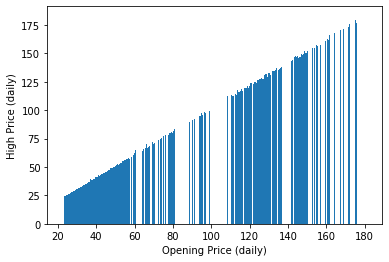

In [42]:
#plotting open vs high
plt.xlabel("Opening Price (daily)")
plt.ylabel("High Price (daily)")
bar1 = plt.bar(df1["Open"],df1["High"],width=0.2)

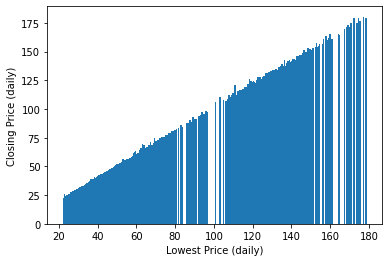

In [43]:
plt.xlabel("Lowest Price (daily)")
plt.ylabel("Closing Price (daily)")
bar2 = plt.bar(df1["Low"], df1["Close"])


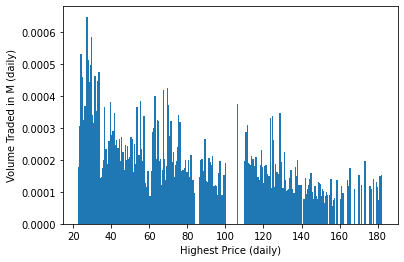

In [45]:
plt.xlabel("Highest Price (daily)")
plt.ylabel("Volume Traded in M (daily)")
bar3 = plt.bar(df1["High"], df1["Volume Traded (in Millions)"])

We can see how there is a visible correlation in Open vs High and Close vs Low

In [47]:
#creating test and train samples
splitval = round(1761*0.8) + 1 
dat_80, dat_20 = df1.iloc[:splitval,:], df1.iloc[splitval:1761,:]
dat_80.info()
print("\n")
dat_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1409
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1410 non-null   float64
 1   High                         1410 non-null   float64
 2   Low                          1410 non-null   float64
 3   Close                        1410 non-null   float64
 4   Adjusted Closing Amount      1410 non-null   float64
 5   Volume Traded (in Millions)  1410 non-null   float64
dtypes: float64(6)
memory usage: 77.1 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 1410 to 1760
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         351 non-null    float64
 1   High                         351 non-null    float64
 2   Low                          351 non-null 

In [ ]:
#exporting csv
dat_80.to_csv("../data/apple_final_train.csv", index=False)
dat_20.to_csv("../data/apple_final_test.csv", index=False)